#### ทดลองสร้าง Relative Strength Rating (RS) บน SET100
- William O'Neil

In [1]:
#!pip install starfishX --upgrade

In [2]:
import starfishX as sx
sx.__version__

0.155536

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np
import starfishX as sx
from starfishX.utilHelpers import HistStockPrice
from starfishX.utilHelpers import rankWithRange

In [4]:
#ดึงข้อมูลสมาชิกใน SET100
basket = sx.getMemberOfIndex(sx.indexMarket.SET100)

In [5]:
#ใช้มาตรฐานตัววัดคือ SET Index
SET = pd.DataFrame({'symbol':'SET'},index=[0])

basket = basket.append(SET,ignore_index=True)

#ขอดูรายชื่อหุ้นที่สนใจ
for i in basket.values:
    print(i[0],end=',')

ACE,ADVANC,AEONTS,AMATA,AOT,AP,AWC,BAM,BANPU,BBL,BCH,BCP,BCPG,BDMS,BEC,BEM,BGRIM,BH,BLA,BPP,BTS,CBG,CENTEL,CHG,CK,CKP,COM7,CPALL,CPF,CPN,CRC,DOHOME,DTAC,EA,EGCO,EPG,ESSO,GLOBAL,GPSC,GULF,GUNKUL,HANA,HMPRO,INTUCH,IRPC,IVL,JMART,JMT,KBANK,KCE,KEX,KKP,KTB,KTC,LH,MAJOR,MEGA,MINT,MTC,OR,ORI,OSP,PLANB,PTG,PTT,PTTEP,PTTGC,QH,RATCH,RBF,RCL,RS,SAWAD,SCB,SCC,SCGP,SINGER,SIRI,SPALI,SPRC,STA,STARK,STEC,STGT,SUPER,SYNEX,TASCO,TCAP,THANI,TIDLOR,TISCO,TOP,TQM,TRUE,TTA,TTB,TU,TVO,VGI,WHA,SET,

In [6]:
#ดึงราคาของหุ้นใน set100 และ setindex มา
obj = HistStockPrice() #สร้างตัวดึงราคาจาก 
p=0
for i in basket.symbol:
 if(p == 0):
    df = obj.getPrice(i,start='2022-01-01')
    p=1
 else:
    k = obj.getPrice(i,start='2022-01-01')
    df[i] = k
    
 print(i,end=',')   

you are using nologin method, data you access may be limited


ACE,ADVANC,AEONTS,AMATA,AOT,AP,AWC,BAM,BANPU,BBL,BCH,BCP,BCPG,BDMS,BEC,BEM,BGRIM,BH,BLA,BPP,BTS,CBG,CENTEL,CHG,CK,CKP,COM7,CPALL,CPF,CPN,CRC,DOHOME,DTAC,EA,EGCO,EPG,ESSO,GLOBAL,GPSC,GULF,GUNKUL,HANA,HMPRO,INTUCH,IRPC,IVL,JMART,JMT,KBANK,KCE,KEX,KKP,KTB,KTC,LH,MAJOR,MEGA,MINT,MTC,OR,ORI,OSP,PLANB,PTG,PTT,PTTEP,PTTGC,QH,RATCH,RBF,RCL,RS,SAWAD,SCB,SCC,SCGP,SINGER,SIRI,SPALI,SPRC,STA,STARK,STEC,STGT,SUPER,SYNEX,TASCO,TCAP,THANI,TIDLOR,TISCO,TOP,TQM,TRUE,TTA,TTB,TU,TVO,VGI,WHA,SET,

In [7]:
df = np.round(df,2)  #ปัดเศษ

In [8]:
#ราคาหุ้นตั้งแต่ 2022-01-04 ถึง 2022-02-11
df

ACE  ADVANC  AEONTS  AMATA    AOT     AP   AWC   BAM  BANPU  \
Date                                                                       
2022-01-04  3.52   228.0   189.0   21.1  61.75   9.55  4.82  21.5   10.6   
2022-01-05  3.56   226.0   191.5   20.9  61.75   9.55  4.76  21.7   10.9   
2022-01-06  3.50   221.0   189.5   20.8  60.50   9.45  4.56  21.2   11.0   
2022-01-07  3.48   221.0   189.0   20.5  61.25   9.65  4.54  21.0   11.2   
2022-01-10  3.42   219.0   191.0   20.5  60.75   9.70  4.48  20.6   11.2   
2022-01-11  3.36   224.0   187.5   20.1  60.25   9.40  4.50  20.5   11.2   
2022-01-12  3.38   222.0   187.5   20.3  60.50   9.50  4.58  20.9   11.2   
2022-01-13  3.36   220.0   188.0   21.1  60.75   9.55  4.62  20.7   11.2   
2022-01-14  3.40   220.0   187.5   20.9  60.50   9.55  4.56  20.6   11.2   
2022-01-17  3.36   218.0   186.0   20.7  61.50   9.50  4.60  20.4   11.2   
2022-01-18  3.28   222.0   185.5   20.8  61.25   9.50  4.58  20.2   10.9   
2022-01-19  3.22   222.0   182.0   20.6  61.25   9.50  4.62  20.1   10.9   
2022-01-20  3.24   221.0   183.0   21.0  62.50   9.40  4.68  19.8   10.9   
2022-01-21  3.24   222.0   182.5   21.6  63.00   9.35  4.70  20.2   10.8   
2022-01-24  3.16   223.0   179.0   21.3  62.00   9.25  4.68  19.9   10.8   
2022-01-25  3.06   222.0   181.5   21.2  62.00   9.45  4.72  19.8   10.6   
2022-01-26  3.08   221.0   184.5   21.3  62.75   9.65  4.76  20.1   10.7   
2022-01-27  3.26   224.0   182.5   21.4  63.00  10.10  4.76  20.0   10.7   
2022-01-28  3.26   222.0   182.0   21.3  64.00  10.00  4.76  20.4   10.7   
2022-01-31  3.26   220.0   183.0   21.4  63.75  10.20  4.90  20.4   11.1   
2022-02-01  3.38   221.0   183.0   21.8  64.25  10.20  4.88  20.8   11.0   
2022-02-02  3.36   223.0   189.5   21.8  64.00  10.30  4.88  21.4   10.9   
2022-02-03  3.32   223.0   191.0   21.7  64.00  10.10  4.90  21.2   10.8   
2022-02-04  3.32   220.0   190.0   21.7  64.25  10.30  4.86  21.2   10.9   
2022-02-07  3.34   219.0   188.5   21.7  64.00  10.60  4.84  21.4   10.9   
2022-02-08  3.34   222.0   195.5   22.0  63.50  10.50  5.00  21.2   11.3   
2022-02-09  3.24   226.0   199.5   22.2  65.50  10.90  5.10  21.8   11.4   
2022-02-10  3.18   229.0   202.0   22.4  65.50  10.80  4.88  21.6   11.3   
2022-02-11  3.16   237.0   200.0   22.2  65.00  10.80  4.94  21.4   11.3   

              BBL  ...    TOP    TQM  TRUE    TTA   TTB    TU    TVO   VGI  \
Date               ...                                                       
2022-01-04  125.0  ...  50.00  47.62  4.72  10.10  1.47  19.8  31.00  6.35   
2022-01-05  126.5  ...  52.00  47.50  4.70  10.10  1.45  20.1  31.00  6.39   
2022-01-06  124.0  ...  51.50  46.88  4.64   9.90  1.41  20.5  31.00  6.25   
2022-01-07  124.5  ...  52.25  47.00  4.62  10.10  1.45  20.5  31.25  6.30   
2022-01-10  126.0  ...  52.00  46.88  4.58  10.50  1.44  20.7  31.75  6.25   
2022-01-11  126.5  ...  52.00  46.75  4.68  10.30  1.44  20.7  31.75  6.25   
2022-01-12  127.0  ...  52.75  49.00  4.68  10.20  1.45  20.7  31.75  6.44   
2022-01-13  129.0  ...  52.25  49.00  4.64  10.40  1.46  20.3  32.00  6.44   
2022-01-14  129.0  ...  52.25  48.25  4.68   9.95  1.44  20.2  31.75  6.35   
2022-01-17  129.5  ...  52.25  48.50  4.64   9.55  1.46  20.3  31.75  6.35   
2022-01-18  131.0  ...  51.75  47.25  4.62   9.45  1.44  19.7  31.75  6.25   
2022-01-19  130.0  ...  52.50  47.00  4.88   9.20  1.42  19.5  31.75  6.15   
2022-01-20  132.0  ...  53.50  47.75  4.74   9.15  1.42  19.4  31.50  6.20   
2022-01-21  130.0  ...  52.50  47.50  4.76   9.05  1.39  19.6  31.75  6.06   
2022-01-24  129.5  ...  51.75  46.75  4.78   8.65  1.35  20.2  31.50  5.82   
2022-01-25  133.5  ...  50.75  47.50  4.84   8.70  1.37  20.4  31.50  5.87   
2022-01-26  136.0  ...  52.50  46.50  4.82   8.70  1.37  20.4  31.50  5.34   
2022-01-27  136.0  ...  52.50  45.25  5.00   8.55  1.37  20.6  31.50  5.34   
2022-01-28  135.0  ...  52.50  46.00  4.94   8.75  1.36  21.1  31.25  5.29   
2022-01-31  135.0 

สูตรหา RS
![title](img/lab12.png)

In [9]:
beginDate = '2022-01-04'
endDate = '2022-02-11'

SETBegin = df[df.index==beginDate]['SET'][0]
SETEnd = df[df.index==endDate]['SET'][0]

print(SETBegin,SETEnd) #ตรวจดัชนีวันแรกที่ทดสอบและวันสุดท้าย

1670.28 1699.2


In [10]:
RS = (df[df.index==endDate].values / df[df.index==beginDate].values) / (SETEnd/SETBegin)

In [11]:
RS = pd.DataFrame({'RS':RS[0]},index=df.columns)

In [12]:
RS = rankWithRange(data=RS,minScope=1,maxScope=99)

In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

'''จากตัวอย่าง ณ ช่วงวันที่ 2022-01-04 - 2022-02-11
   - BLA มี RS Ranking ที่ 99 แข็งแกร่งสุดจากหุ้นใน SET100 เมื่อเทียบกับ SET Index'''

report = rankWithRange(data=RS,minScope=1,maxScope=99)
report

RS  RANK  RS_Rank
BLA     1.245108   101    99.00
BBL     1.163849   100    98.02
IVL     1.163758    99    97.04
CRC     1.149331    98    96.06
KBANK   1.134987    97    95.08
KKP     1.130827    96    94.10
BCP     1.117899    95    93.12
GUNKUL  1.117405    94    92.14
AP      1.111643    93    91.16
KTC     1.093566    92    90.18
CENTEL  1.091340    91    89.20
PTTEP   1.077577    90    88.22
MINT    1.073844    89    87.24
TCAP    1.072342    88    86.26
LH      1.071338    87    85.28
CPALL   1.057012    86    84.30
BCPG    1.056704    85    83.32
KTB     1.055794    84    82.34
SCB     1.052096    83    81.36
STA     1.048512    82    80.38
BANPU   1.047894    81    79.40
BH      1.045724    80    78.42
GULF    1.045063    79    77.44
TU      1.042555    78    76.46
TOP     1.041959    77    75.48
TRUE    1.041293    76    74.50
PTT     1.041183    75    73.52
AEONTS  1.040191    74    72.54
ESSO    1.036476    73    71.56
AOT     1.034716    72    70.58
AMATA   1.034226    71    69.60
ADVANC  1.021782    70    68.62
SIRI    1.021378    69    67.64
QH      1.017471    68    66.66
TVO     1.014689    67    65.68
BEC     1.010670    66    64.70
ORI     1.008402    65    63.72
AWC     1.007453    64    62.74
BEM     1.005974    63    61.76
CPN     1.004922    62    60.78
BDMS    1.004922    61    59.80
SET     1.000000    60    58.82
RATCH   0.999273    59    57.84
DTAC    0.999095    58    56.86
IRPC    0.998103    57    55.88
SPALI   0.995971    56    54.90
TTA     0.992713    55    53.92
SAWAD   0.990876    54    52.94
HMPRO   0.989622    53    51.96
TISCO   0.987970    52    50.98
SCC     0.982980    51    50.00
CKP     0.982980    50    49.02
EGCO    0.982980    49    48.04
BAM     0.978408    48    47.06
THANI   0.974164    47    46.08
MAJOR   0.973390    46    45.10
GLOBAL  0.973199    45    44.12
SUPER   0.972633    44    43.14
TASCO   0.972178    43    42.16
WHA     0.971936    42    41.18
STEC    0.969874    41    40.20
BTS     0.967377    40    39.22
STGT    0.966320    39    38.24
INTUCH  0.958406    38    37.26
MTC     0.957989    37    36.28
TQM     0.954700    36    35.30
BPP     0.954405    35    34.32
PTTGC   0.954069    34    33.34
PTG     0.950645    33    32.36
TTB     0.949546    32    31.38
OSP     0.947365    31    30.40
EA      0.940022    30    29.42
TIDLOR  0.937412    29    28.44
SPRC    0.933083    28    27.46
CPF     0.928370    27    26.48
PLANB   0.928031    26    25.50
DOHOME  0.919425    25    24.52
STARK   0.919150    24    23.54
BCH     0.907366    23    22.56
CK      0.906051    22    21.58
OR      0.901817    21    20.60
SCGP    0.897193    20    19.62
MEGA    0.892244    19    18.64
COM7    0.889084    18    17.66
ACE     0.882448    17    16.68
JMART   0.881293    16    15.70
EPG     0.867335    15    14.72
JMT     0.866296    14    13.74
CHG     0.856676    13    12.76
RCL     0.855193    12    11.78
GPSC    0.840963    11    10.80
RS      0.833495    10     9.82
VGI     0.828180     9     8.84
CBG     0.821904     8     7.86
BGRIM   0.807015     7     6.88
SINGER  0.798383     6     5.90
KEX     0.789661     5     4.92
SYNEX   0.747920     4     3.94
RBF     0.744813     3     2.96
HANA    0.685278     2     1.98
KCE     0.663650     1     1.00

<AxesSubplot:>

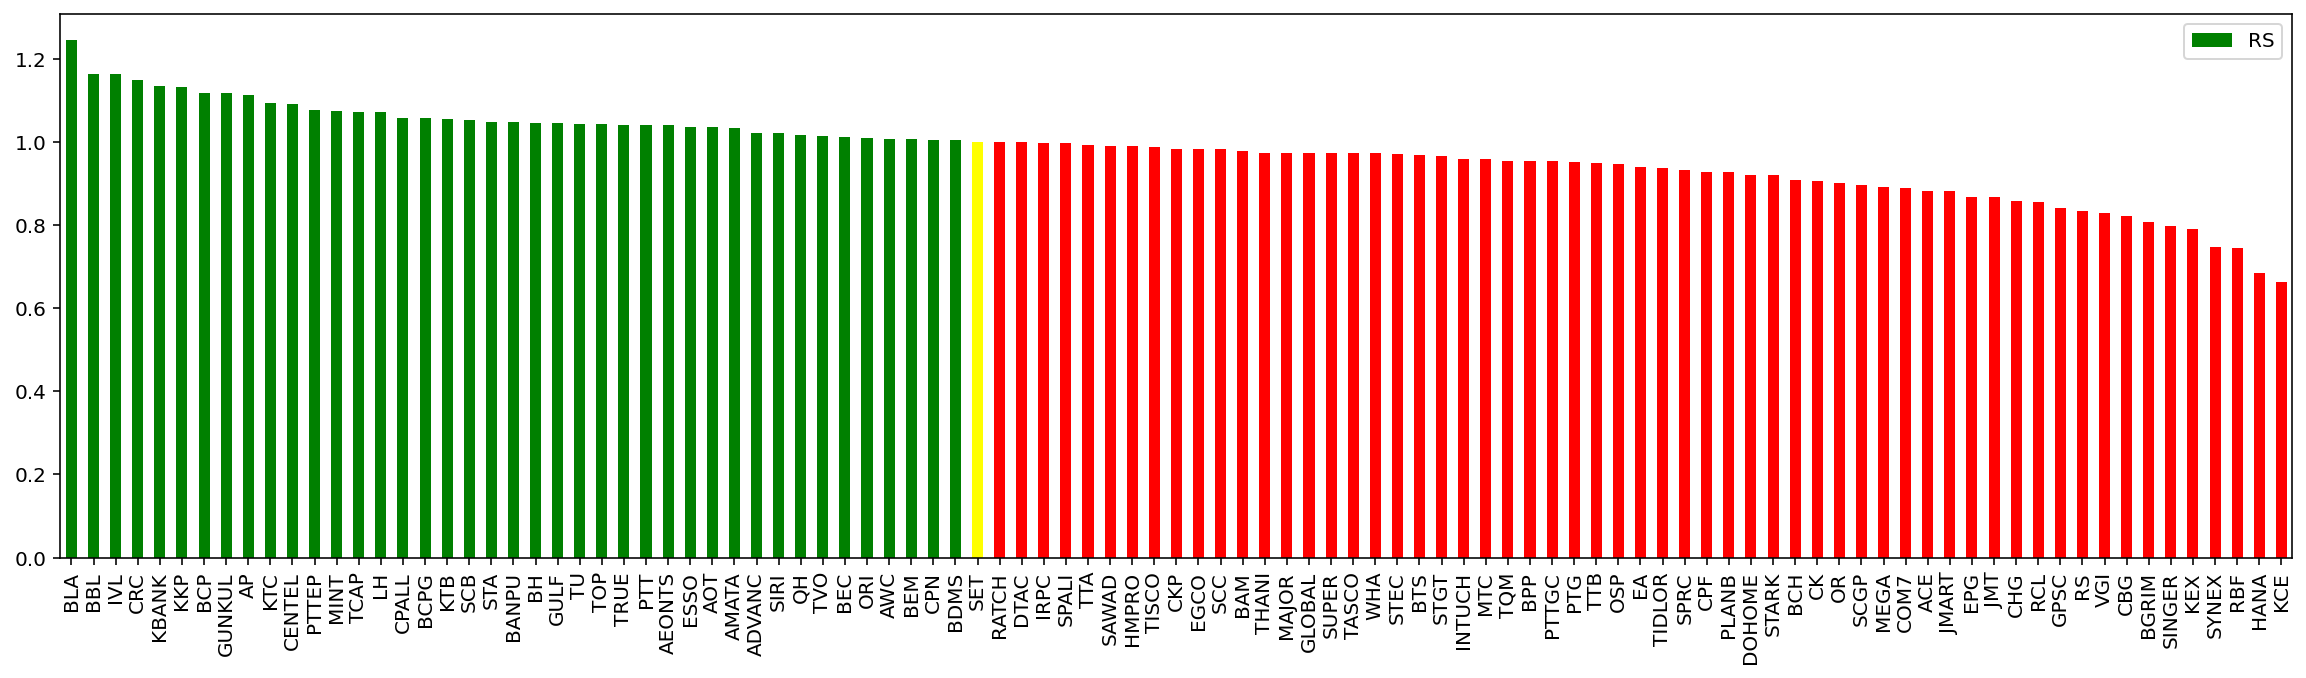

In [14]:
color = []
setvalue = RS[RS.index=='SET'].values[0][0]
for i in RS['RS']:
    if(i>setvalue):
        color.append('green')
    elif(i<setvalue):
        color.append('red')
    else:
        color.append('yellow')
    
RS[['RS']].plot(kind='bar',figsize=(20,5),color=[color])